<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/EvaluacionFinal_RegresionMultilineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving precios-propiedades.csv to precios-propiedades.csv
User uploaded file "precios-propiedades.csv" with length 39676 bytes


## Activación de paquetes

In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.formula.api as sfm

In [4]:
propiedades = pd.read_csv('/content/precios-propiedades.csv')

In [19]:
#Forma del dataset
propiedades.shape

(506, 14)

In [5]:
propiedades.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [6]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Valores nulos

In [21]:
#No hay valores nulos
propiedades.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Valores duplicados

In [23]:
#No hay valores duplicados
propiedades.duplicated(subset = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                             'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' ]).sum()

0

## **1.** Identifique los tipos de variable de cada atributo del set de datos


In [57]:
propiedades['CRIM'] = pd.to_numeric(propiedades['CRIM'])
propiedades['ZN'] = pd.to_numeric(propiedades['ZN'])
propiedades['INDUS'] = pd.to_numeric(propiedades['INDUS'])
propiedades['NOX'] = pd.to_numeric(propiedades['NOX'])
propiedades['RM'] = pd.to_numeric(propiedades['RM'])
propiedades['AGE'] = pd.to_numeric(propiedades['AGE'])
propiedades['DIS'] = pd.to_numeric(propiedades['DIS'])
propiedades['RAD'] = pd.to_numeric(propiedades['RAD'])
propiedades['TAX'] = pd.to_numeric(propiedades['TAX'])
propiedades['PTRATIO'] = pd.to_numeric(propiedades['PTRATIO'])
propiedades['B'] = pd.to_numeric(propiedades['B'])
propiedades['LSTAT'] = pd.to_numeric(propiedades['LSTAT'])
propiedades['MEDV'] = pd.to_numeric(propiedades['MEDV'])

propiedades['CHAS'] = propiedades['CHAS'].astype('category')

### **CRIM**: Tasa de criminalidad per cápita del sector.

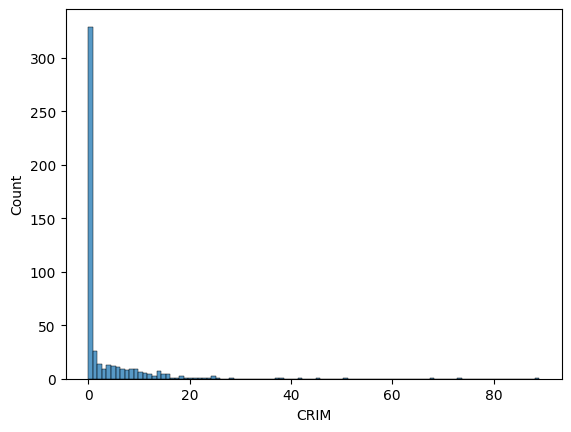

In [59]:
sns.histplot(data = propiedades, x = 'CRIM')
plt.show()

In [74]:
#Hay valores atípicos.

fig = px.box(propiedades, y = 'CRIM')

fig.show()

### **ZN**: Proporción de suelo residencial para lotes sobre 25,000 sq ft.

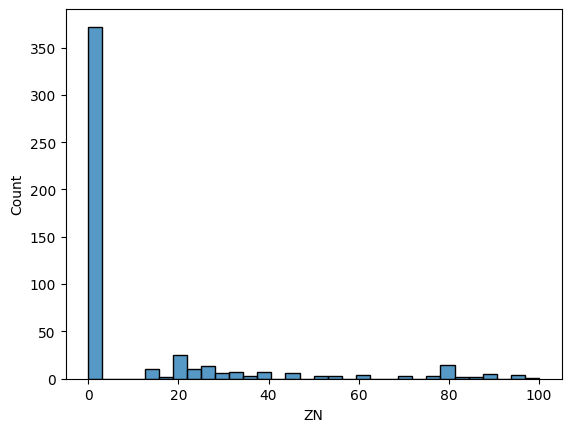

In [36]:
sns.histplot(data = propiedades, x = 'ZN')
plt.show()

In [75]:
#Hay valores atípicos.

fig = px.box(propiedades, y = 'ZN')

fig.show()

### **INDUS**: Proporción de negocios no-retail por sector


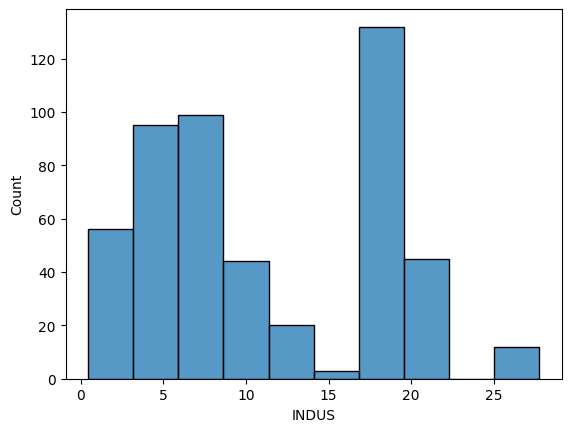

In [37]:
sns.histplot(data = propiedades, x = 'INDUS')
plt.show()

In [76]:
#No hay valores atípicos.

fig = px.box(propiedades, y = 'INDUS')

fig.show()

### **NOX**: Concentración óxido nítrico (part per 10 million).


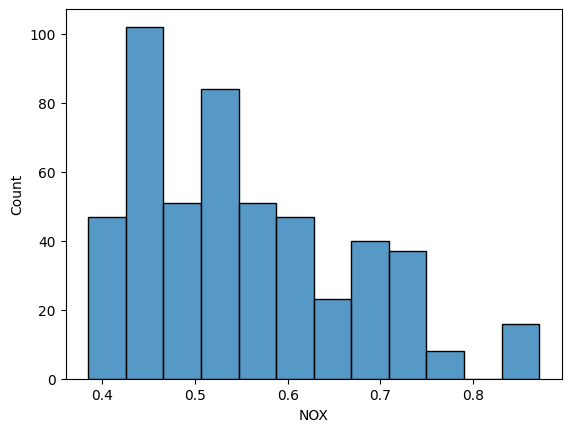

In [38]:
sns.histplot(data = propiedades, x = 'NOX')
plt.show()

In [64]:
#No hay valores atípicos.

fig = px.box(propiedades, y = 'NOX')

fig.show()

### **RM**: Promedio número de dormitorios por vivienda

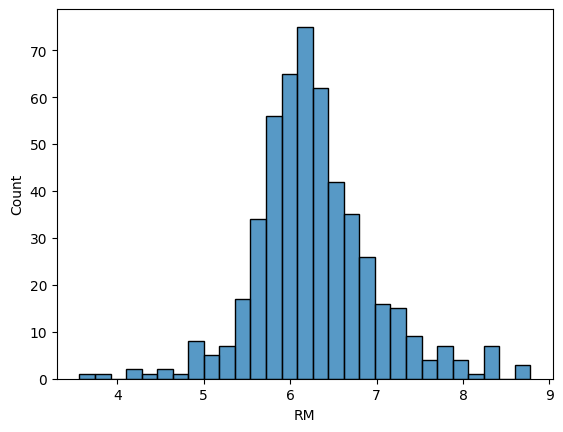

In [39]:
sns.histplot(data = propiedades, x = 'RM')
plt.show()

In [77]:
#Hay valores atípicos.

fig = px.box(propiedades, y = 'RM')

fig.show()

### **AGE**: Proporción de viviendas ocupadas por sus propietarios construidas previo a 1940

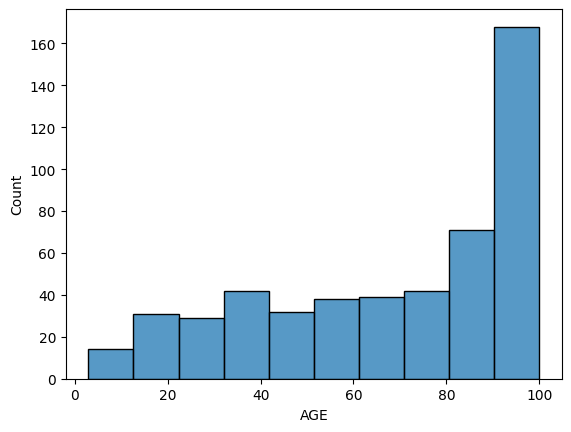

In [40]:
sns.histplot(data = propiedades, x = 'AGE')
plt.show()

In [78]:
#No hay valores atípicos.

fig = px.box(propiedades, y = 'AGE')

fig.show()

### **DIS**: Distancias ponderadas a cinco centros de empleo de Boston.

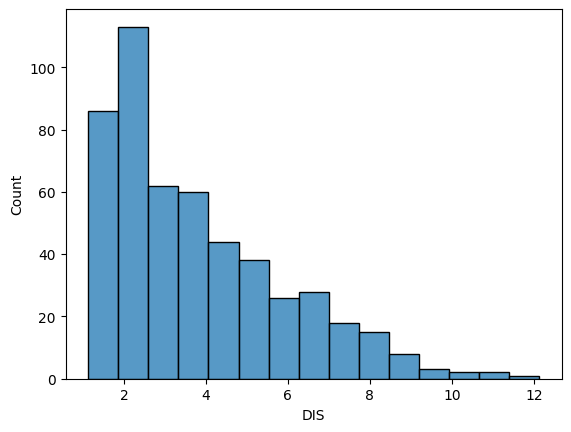

In [41]:
sns.histplot(data = propiedades, x = 'DIS')
plt.show()

In [79]:
#Hay valores atípicos.

fig = px.box(propiedades, y = 'DIS')

fig.show()

### **RAD**: Índice de accesibilidad a carreteras radiales

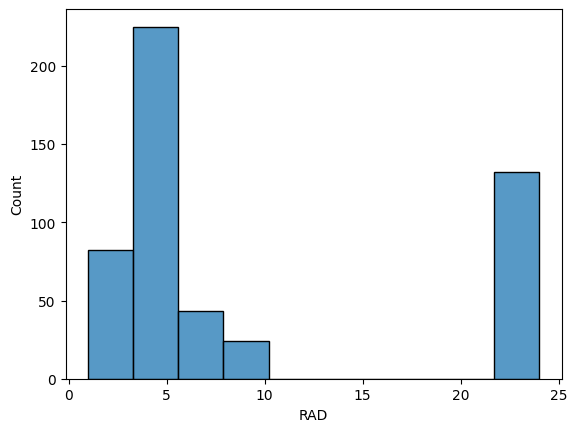

In [42]:
sns.histplot(data = propiedades, x = 'RAD')
plt.show()

In [68]:
#No hay valores atípicos.

fig = px.box(propiedades, y = 'RAD')

fig.show()

### **TAX**: Tasa de impuesto a la propiedad de valor total por $ 10,000.


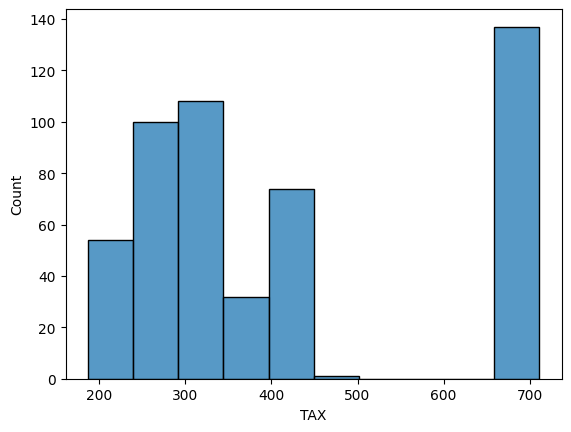

In [43]:
sns.histplot(data = propiedades, x = 'TAX')
plt.show()

In [69]:
#No hay valores atípicos.

fig = px.box(propiedades, y = 'TAX')

fig.show()

### **PTRATIO**: Proporción alumno-profesor por ciudad-

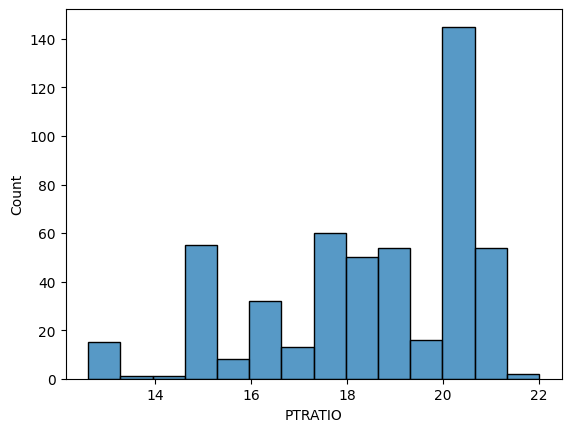

In [44]:
sns.histplot(data = propiedades, x = 'PTRATIO')
plt.show()

In [70]:
#Hay valores atípicos.

fig = px.box(propiedades, y = 'PTRATIO')

fig.show()

### **B**: 1000 (Bk - 0,63) ², donde Bk es la proporción de (personas de otras etnias) por sector.

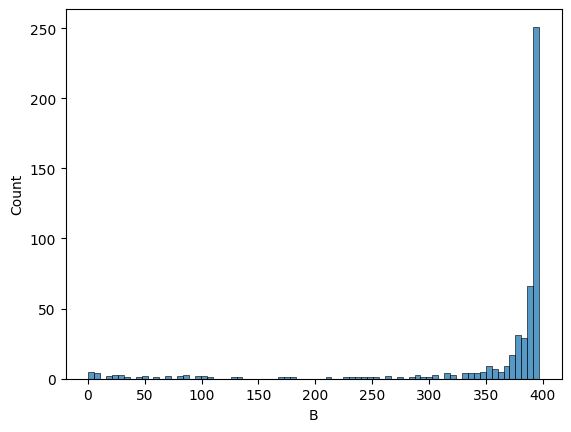

In [45]:
sns.histplot(data = propiedades, x = 'B')
plt.show()

In [71]:
#Hay valores atípicos.

fig = px.box(propiedades, y = 'B')

fig.show()

### **LSTAT**: Porcentaje de menor estatus de la población.

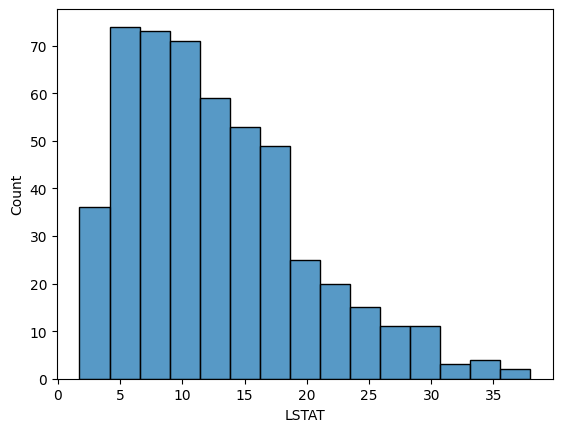

In [46]:
sns.histplot(data = propiedades, x = 'LSTAT')
plt.show()

In [80]:
#Hay valores atípicos.

fig = px.box(propiedades, y = 'LSTAT')

fig.show()

### **MEDV**: Valor de las viviendas en 1000 US$.

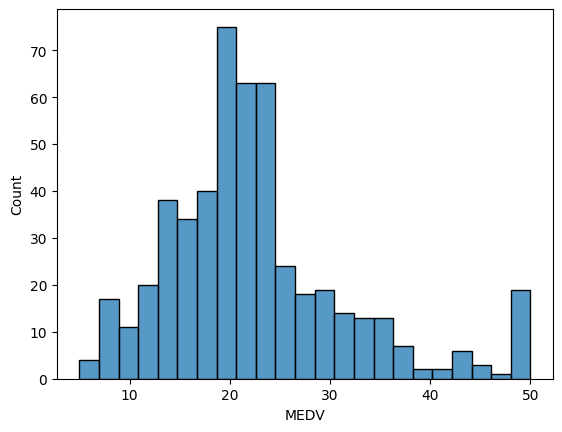

In [47]:
sns.histplot(data = propiedades, x = 'MEDV')
plt.show()

In [81]:
#Hay valores atípicos.

fig = px.box(propiedades, y = 'MEDV')

fig.show()

## **2.** Defina medidas de tendencia central y de dispersión que utilizará en el estudio



In [9]:
propiedades.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### **CHAS**: 1 si el tramo limita con el Río Biobío, caso contrario, 0.


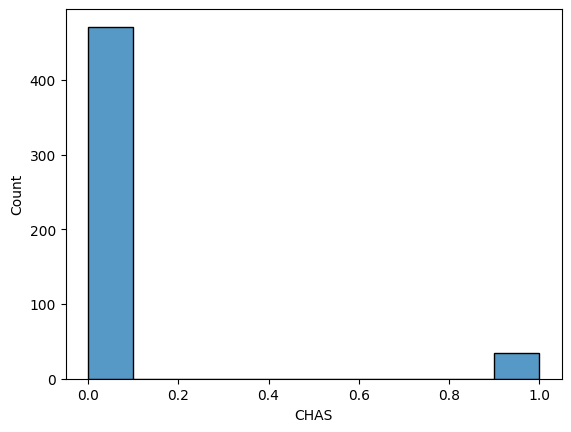

In [35]:
sns.histplot(data = propiedades, x = 'CHAS')
plt.show()

 ¿Qué pasa con la variable **CHAS**?

**R.-** _La variable **'CHAS'**, es una variable de tipo binaria, por la cual no se utilizara ya que se tiene que utilizar otro tratamiento para usarla o usar un modelo de regresión mixto generalizado._

## **3.** Realice un análisis exploratorio y visual


¿Qué insights puede encontrar en la información?

**R.-** Las variables dependientes poseen medianamente  correlación lineal tanto positiva como negativa, a excepción de **RM** y **LSTAT** que poseen una correlación fuerte.

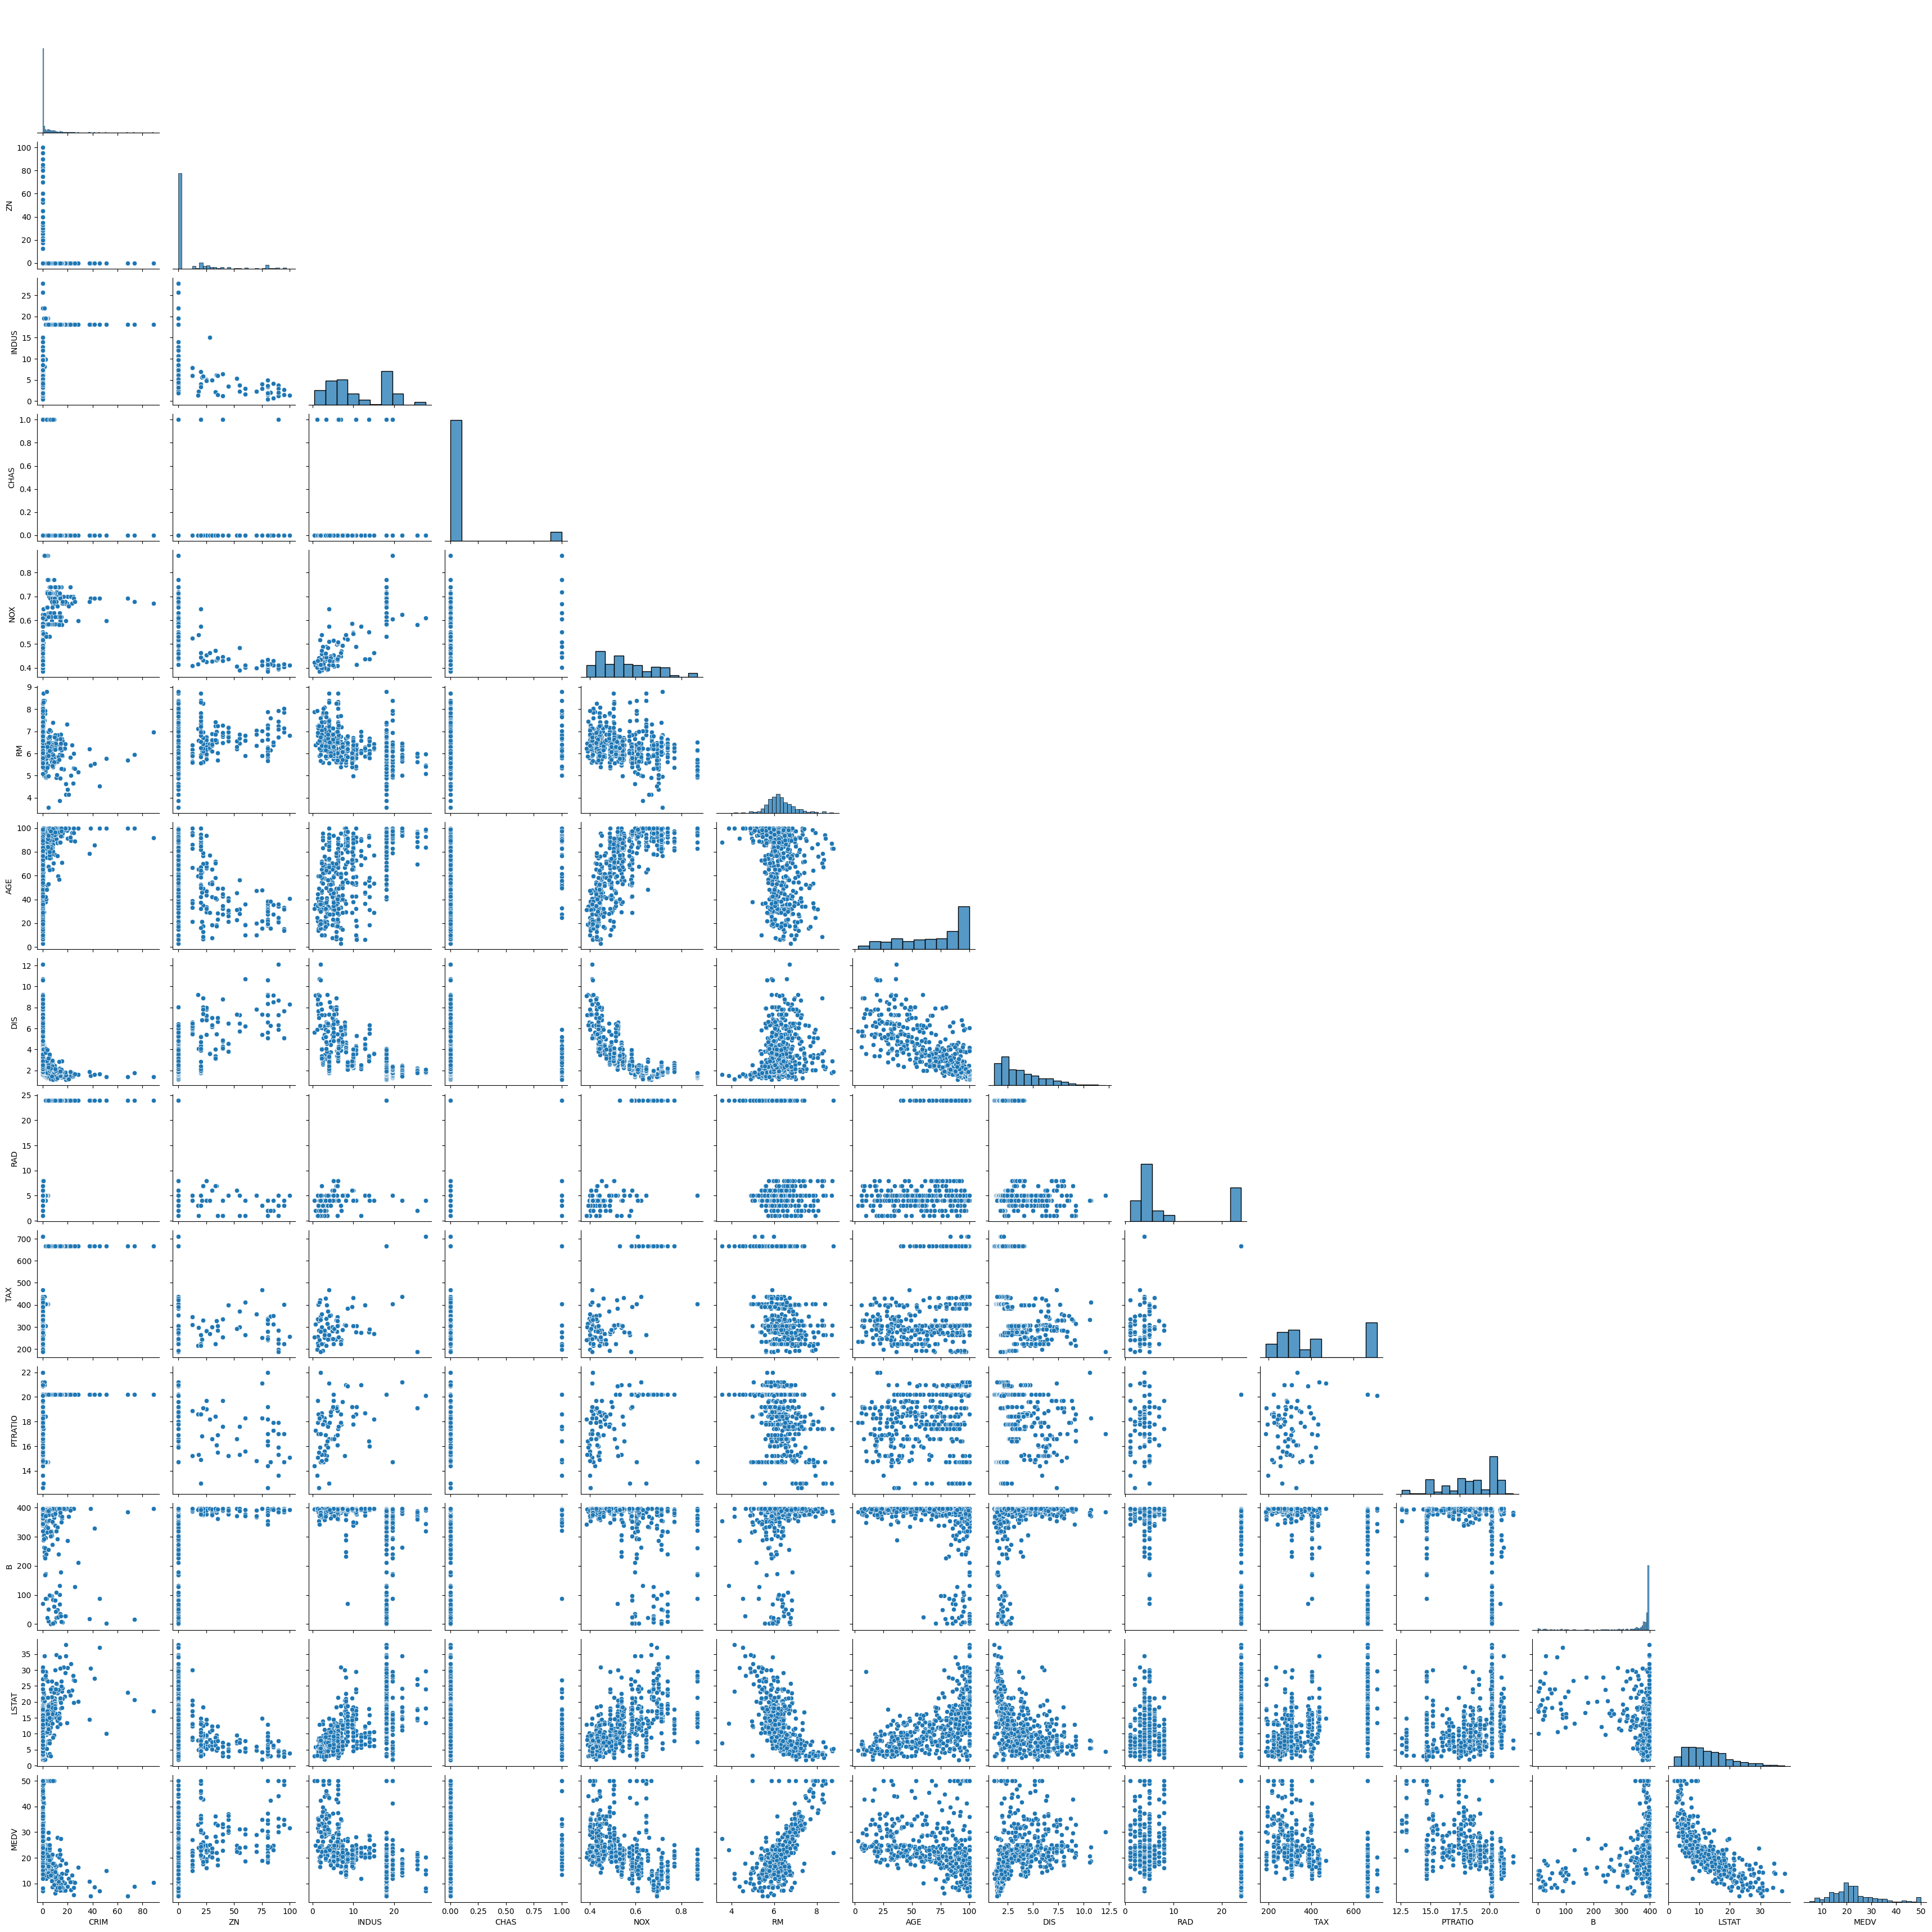

In [28]:
sns.pairplot(propiedades, corner = True)
plt.show()

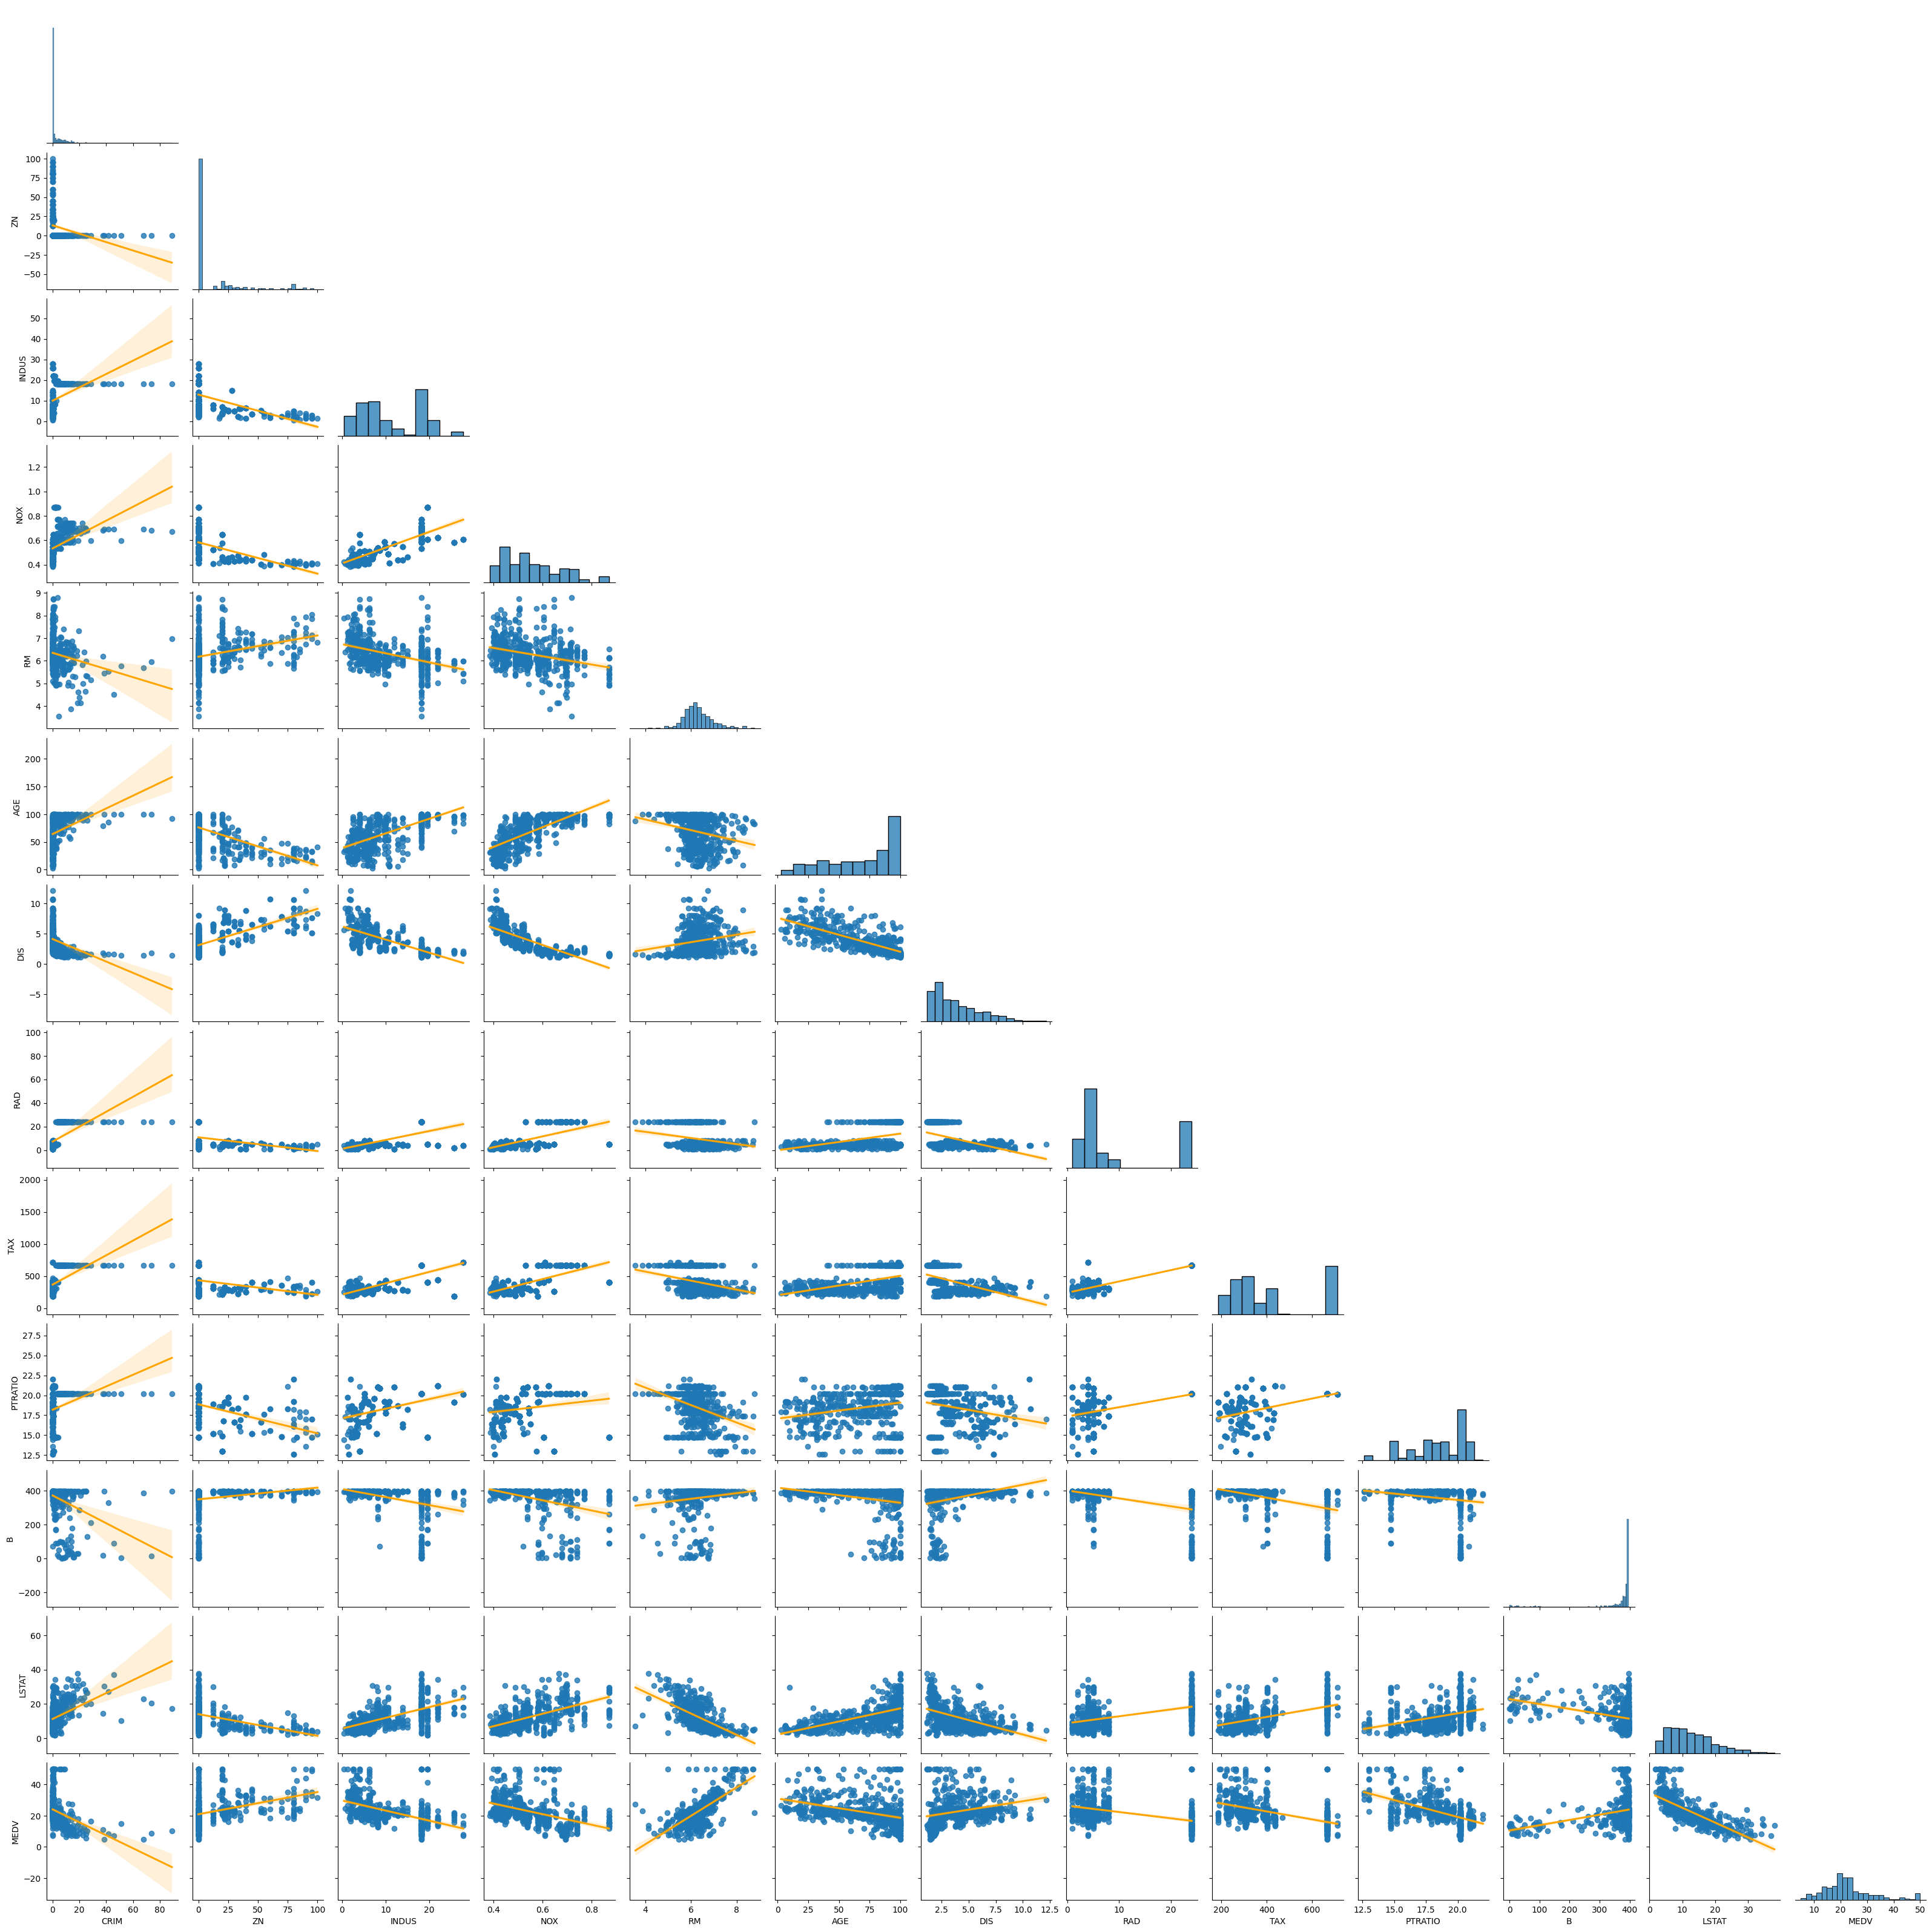

In [83]:
sns.pairplot(propiedades, corner = True, kind="reg" , plot_kws={'line_kws':{'color':'orange'}})
plt.show()

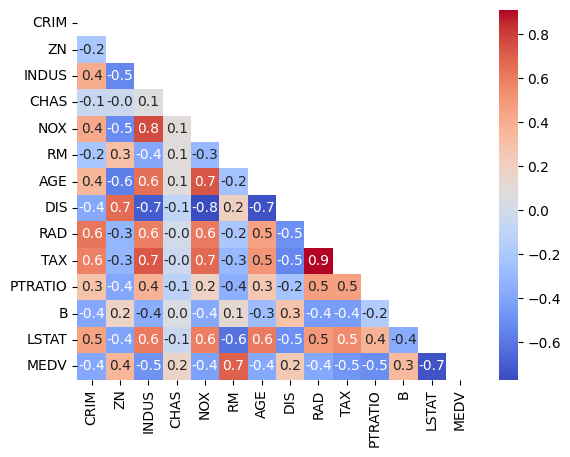

In [8]:
corr = propiedades.corr()
matrix = np.triu(corr)
ax = sns.heatmap(propiedades.corr(),cmap='coolwarm', fmt=".1f", annot=True, mask=matrix)

## **4.** Realice un modelamiento regresivo

¿Qué nivel de ajuste tiene el modelo?

**R.-** _El modelo elegido es el siguiente:_

```
MEDV ~ CRIM + ZN + NOX +RM + DIS + RAD +TAX + PTRATIO + B + LSTAT
```
_ya que posee un Coeficiente de determinación adjustado de **0.73** y un **AIC** de **3030**, en comparación al primer modelo que es el siguiente:_
```
MEDV ~ CRIM + ZN + INDUS + NOX +RM + AGE + DIS + RAD +TAX + PTRATIO + B + LSTAT
```
_que posee un Coeficiente de determinación adjustado de **0.729** y con un **AIC** de **3034**, lo cual demuestra que no es un modelo muy óptimo en comparación al elejido y por eso se le extirpan las variables que poseen un p-value > 0.05, las cuales son **INDUS** y **AGE**._


¿Cuáles son las variables que más inciden en el precio de una propiedad?

**R.-** _**RM**: Promedio número de dormitorios por vivienda y **LSTAT**: Porcentaje de menor estatus de la población, son las variables más significativa que influyen en el **MEDV**: Valor de las vivienda,según las estadísticas._

In [49]:
lm = sfm.ols(formula= "MEDV ~ CRIM + ZN + INDUS + NOX +RM + AGE +DIS +RAD +TAX + PTRATIO + B + LSTAT" , data = propiedades).fit()

In [50]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          7.30e-134
Time:                        08:34:35   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.000      26.780      47.004
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RM             3.8505      0.421      9.137      0.000       3.023       4.678
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
lm2 = sfm.ols(formula= "MEDV ~ CRIM + ZN + NOX +RM + DIS +RAD +TAX + PTRATIO + B + LSTAT" , data = propiedades).fit()

In [54]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          6.70e-136
Time:                        08:35:20   Log-Likelihood:                -1504.0
No. Observations:                 506   AIC:                             3030.
Df Residuals:                     495   BIC:                             3076.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6203      5.113      7.162      0.000      26.574      46.667
CRIM          -0.1141      0.033     -3.453      0.001      -0.179      -0.049
ZN             0.0457      0.014      3.352      0.001       0.019       0.073
NOX          -16.4692      3.556     -4.631      0.000     -23.456      -9.482
RM             3.8446      0.410      9.381      0.000       3.039       4.650
DIS           -1.5261      0.187     -8.155      0.000      -1.894      -1.158
RAD            0.3155      0.064      4.947      0.000       0.190       0.441
TAX           -0.0127      0.003     -3.737      0.000      -0.019      -0.006
PTRATIO       -0.9784      0.130     -7.535      0.000      -1.234      -0.723
B              0.0097      0.003      3.611      0.000       0.004       0.015
LSTAT         -0.5281      0.048    -11.042      0.000      -0.622      -0.434
==============================================================================
Omnibus:                      192.780   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.734
Skew:                           1.632   Prob(JB):                    1.16e-200
Kurtosis:                       8.746   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""